# Data Cleaning and Visualization

### Notebook created by [Bright Cape](https://brightcape.nl/)
*Author: Maurits Akkerman*

# Contents

* [Introduction](#Introduction)

* [Step 1: Business Understanding](#Step-1:-Business-Understanding)

* [Step 2: Data Acquisition & Understanding](#Step-2:-Data-Acquisition-&-Understanding)

    - [Step 2.1: Exploratory Analysis](#Step-2.1:-Exploratory-Analysis)

    - [Step 2.2: Data Cleaning](#Step-2.2:-Cleaning-the-Data)
    
    - [Step 2.3: Data Understanding](#Step-2.3:-Data-Understanding)

* [Conclusion](#Conclusion)


## Introduction

[[ go back to the top ]](#Table-of-contents)

In the time it took you to read this sentence, terabytes of data have been collectively generated across the world — more data than any of us could ever hope to process, much less make sense of, and all of that on the machine you're using to read this notebook.

In response to the massive influx of data in the past decade, the field of Data Science has come to the forefront. Cobbled together by people from a diverse array of fields — statistics, physics, computer science, design, and many more — the field of Data Science represents our collective desire to understand and harness the abundance of data around us to build a better world.

In three seperate notebooks, we will go over a basic Python data analysis pipeline from start to finish to show you a typical data science workflow. For the combined notebooks we use the structure of the data science lifecycle. First, we define the business case and define the succes measure. Then, we try to understand and clean the provided data. These two subjects are the main topic of this notebook. Subsequently, in the modelling phase, we focus on predicting a target variable through the use of linear regression (Notebook 2) and some basic machine learning algorithms (Notebook 3) The final phase of deployment and subsequent customer acceptance is not executed, though conclusions are provided. Remember that the datascience is non-linear, in contrast to the depicted figure. As you will see in Notebooks 2 and 3, sometimes additional data cleaning steps or pre-processing steps are required for specific data models. Further, the order of the notebooks is not a project order that is set in stone. The idea of these notebooks is to provide real-life examples of the materials discussed during the Applied Data Science course.

<img src="https://drive.google.com/uc?id=1yX1hvNeepHnm1O58voKm_qQultGcpNOy" style="width: 800px;" />

This notebook makes use of (a subset of) a public dataset of the Google Merchandise store. This is real-life data from Google Analytics and looks like something you might get from a company when asked to perform data science experiments using their webstore data. Note that therefore the examples might not always look as perfect as you might find in other online materials, but this is real-life data science, and you never get perfect data to start with.




# Step 1: Business Understanding

[[ go back to the top ]](#Contents)

## Background information

For the purposes of this exercise, let's pretend we're working as a data scientist for Google. We've been tasked by our company's Head of Data Science to create a demo machine learning model that can predict the expected amount of revenue we can get from a customer based on their behavior in our Google Merchandise webstore. We want to use this model to perform real-time estimation of customer value for our current traffic, so it needs to be fast and as accurate as possible.

<img src= "https://phandroid.com/wp-content/uploads/2015/03/Google-Merchandise-Store-new-URL.png" />

We've been given access to a dataset containing the Google Analytics data for this particular webstore for 2017-2018. This dataset contains info on each visit to the webstore, including things like, how many pages were visited, total time spent in the webstore, and total revenue from a given customer. To us the task to predict the expected revenue from a webstore customer!

## Defining the Problem

The first step to any data analysis project is to define the question or problem we're looking to solve and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to predict the expected revenue (USD) from a webstore customer based on behavioral web statistics.

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing two seperate modelling steps, two measures of succes have to be defined.
In case of linear regression, we can use R-squared to quantify how well our model is performing. Our company's Head of Data has no idea of the predictive power of our dataset but has told us to come up with a model with at least an R-squared of 0.6.
Further, the company's Head of Data has defined the F1 statistic to be above 0.95 (don't worry if you're unfamiliar with R-squared or F1 statistics, we will explain these at a later stage in these notebooks).

>Did you understand the context for the question and the scientific or business application?

We're building part of a data analysis pipeline for an algorithm that can do real-time predictions on customer value in web store traffic data.

<hr />

Notice that we've spent a fair amount of time working on the problem without writing a line of code or even looking at the data.

**Thinking about and documenting the problem we're working on is an important step to performing effective data analysis that often goes overlooked.** 

#### Don't skip it.

# Step 2: Data Acquisition & Understanding
[[ go back to the top ]](#Contents)

It is almost time to write some code. But, before doing so, there are some essential and widely used python packages that we need to install.

### Required libraries

If you don't have Python on your computer, you can use the [Anaconda Python distribution](https://www.anaconda.com/products/individual) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. We will use statsmodels for teaching purposes since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on scikit-learn since it provides significantly more useful functionality for machine learning in general. The primary libraries that we'll be using are:

* **numpy**: Foundational package for scientific computing
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **statsmodels**: General statistics package in Python
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`. If you have installed Anaconda, simply search your computer for the anaconda prompt and enter the following lines of code:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this allows plots to appear directly in the notebook
%matplotlib inline

## Step 2.1: Exploratory Analysis
[[ go back to the top ]](#Contents)

Now it is finally time to look at the data. Even curated data sets from the government can have errors in them, and we must spot these errors before investing too much time in our analysis.

Generally, we're trying to gain a high-level understanding of the dataset. We will look at:

* The target variable for the considered business case
* The number of observations and variables
* The datatypes and distributions of the variables
* A correlation matrix

Let's start by reading the data into a pandas DataFrame.

In [2]:
# Download the data *Note you don't have to understand what happens in this bit of code
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1FFrwtStZaUvx4FJsiS5UmRxxnQDZNVUb/view?usp=sharing'
dwn_url='https://drive.google.com/uc?export=download&id=' + orig_url.split('/')[-2]
url = requests.get(dwn_url).text
csv_raw = StringIO(url)

# Read the data into a pandas data frame
data = pd.read_csv(csv_raw, index_col=0, delimiter=';')
data.reset_index(inplace=True)

In [3]:
# Let's take a look at the data
data.shape

(4055, 21)

We can see that there are 4055 observations and 21 unique variables.

In [4]:
# Let's print the top rows of the dataset to get an idea of it's contents
data.head()

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,transactionRevenue,totalTransactionRevenue,...,campaign,medium,browser,operatingSystem,isMobile,continent,subContinent,country,region,city
0,1,1470402620,1470402620,20160805,1,11,11,225.0,45000000.0,52000000.0,...,(not set),organic,Chrome,Chrome OS,FALSE,Americas,Northern America,United States,NaN,NaN
1,1,1470402622,1470402622,20160805,1,60,39,1848.0,79990000.0,83990000.0,...,(not set),(none),Chrome,Linux,FALSE,Americas,Northern America,United States,New York,New York
2,5,1470404754,1470404754,20160805,1,40,29,2180.0,27180000.0,30180000.0,...,(not set),(none),Chrome,Macintosh,FALSE,Americas,Northern America,United States,Illinois,Chicago
3,1,1470407087,1470407087,20160805,1,63,51,2407.0,27190000.0,29190000.0,...,(not set),(none),Chrome,Macintosh,FALSE,Americas,Northern America,United States,Illinois,Chicago
4,6,1470407542,1470407542,20160805,1,104,68,2042.0,346970000.0,355970000.0,...,(not set),(none),Chrome,Windows,FALSE,Americas,Northern America,United States,NaN,NaN


A couple of things immediately stand out:

1. We were tasked to predict the expected revenue and we have two columns that describe the transaction revenue. Hence, one of these variables is our target variable.
2. There are irrelevant columns available in the dataset such as visit ID. These variables will not provide value in predicting the target variable.
3. We observe several numerical as well as non-numericakl columns. Both require seperate checks to verify the data.
4. There are a lot of missing values in the dataset (NaN). We will have to deal with these somehow

In summary, we have learned that several data cleaning steps are required and that we need to discuss which variable is the target variable.

In [5]:
# Let's further investigate the amount of missing data 
# and check if the datatypes are correctly specified
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4055 entries, 0 to 4054
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visitNumber              4055 non-null   int64  
 1   visitId                  4055 non-null   int64  
 2   visitStartTime           4055 non-null   int64  
 3   date                     4055 non-null   int64  
 4   visits                   4055 non-null   int64  
 5   hits                     4055 non-null   int64  
 6   pageviews                4055 non-null   int64  
 7   timeOnSite               2948 non-null   float64
 8   transactionRevenue       2015 non-null   float64
 9   totalTransactionRevenue  2015 non-null   float64
 10  sessionQualityDim        58 non-null     float64
 11  campaign                 3984 non-null   object 
 12  medium                   4055 non-null   object 
 13  browser                  4055 non-null   object 
 14  operatingSystem         

We can see that especially for our target variable, either transaction revenue or total transaction revenue, a lot of the data points are missing. Further, the session quality dim only has 58 observations out of the 4055 rows. Using missing data techniques such as imputing or dropping rows is highly unlikely to work as so many data points are missing.

Now would be a good time to sit with the problem owner and ask why data is missing and if additional data sources can be used to complement the current dataset.

Since this is an example, we assume that we can not reach the problem owner and therefore need to advance our project with the data available.

In [6]:
# Another good idea is to look at the distribution of our data - especially to spot potential outliers.
data.describe()

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,transactionRevenue,totalTransactionRevenue,sessionQualityDim
count,4055.000000,4.055000e+03,4.055000e+03,4.055000e+03,4055.0,4055.000000,4055.000000,2948.000000,2.015000e+03,2.015000e+03,58.000000
mean,3.365721,1.487261e+09,1.487261e+09,2.016837e+07,1.0,20.663379,16.387423,812.216079,1.152193e+08,1.319950e+08,61.396552
std,12.669713,6.266789e+06,6.266789e+06,3.811556e+03,0.0,29.806950,22.937811,948.883420,2.120658e+08,2.525351e+08,23.855515
min,1.000000,1.470403e+09,1.470403e+09,2.016080e+07,1.0,1.000000,1.000000,0.000000,-3.500000e+07,-3.460000e+07,1.000000
25%,1.000000,1.487037e+09,1.487037e+09,2.017021e+07,1.0,1.000000,1.000000,225.750000,2.297000e+07,2.890000e+07,42.250000
50%,1.000000,1.488566e+09,1.488566e+09,2.017030e+07,1.0,13.000000,11.000000,547.500000,4.782000e+07,5.416000e+07,67.500000
75%,3.000000,1.488609e+09,1.488609e+09,2.017030e+07,1.0,29.000000,23.000000,1067.500000,1.038600e+08,1.121750e+08,80.000000
max,315.000000,1.501302e+09,1.501302e+09,2.017073e+07,1.0,500.000000,469.000000,14279.000000,2.870000e+09,3.775800e+09,97.000000


One observation that we can make is that the transactionRevenue and totalTransactionRevenue columns have a minimum value of -3.5e-07 and -3.46e-07 respectively. This would imply a minimum transaction of -35.000.000 and 34.600.000 dollars? This is absurd and must be some kind of data error. On the other hand, the maximum is 2.870.000.000 and 3.775.800.000, both implying the products sold are extremely expensive, or that the prices are expressed in dollar cents, or maybe even contain redundant zeros. This requires consulting the problem owner to get additional information.

> The scale of the totalTransactionRevenue variable needs to be verified.

Though, if you ask me, tables like these are rarely useful unless we know that our data should fall in a particular range. Usually, it is better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.

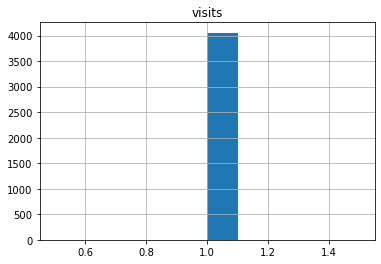

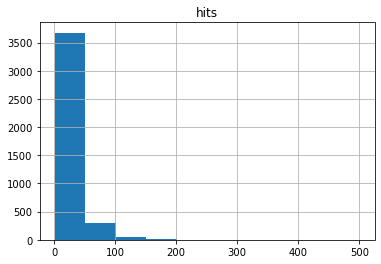

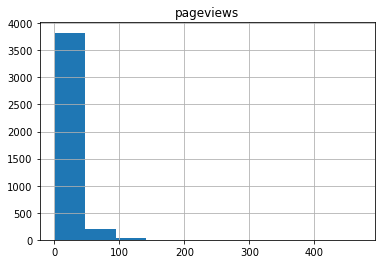

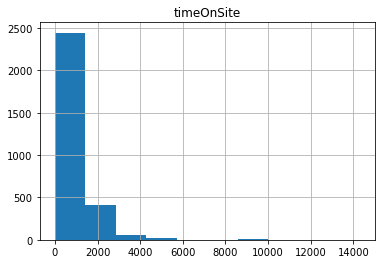

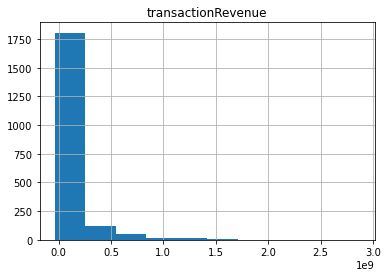

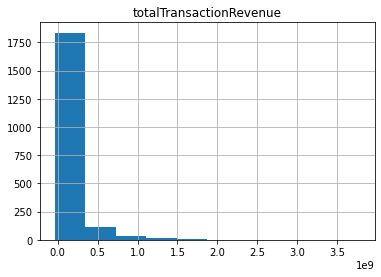

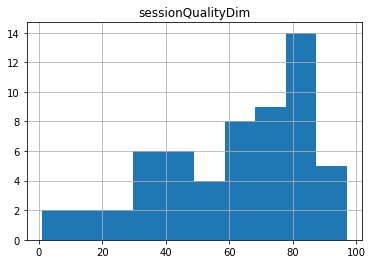

In [7]:
# Visualize histograms for numerical columns in the dataset
for column in ['visits', 'hits', 'pageviews', 'timeOnSite', 'transactionRevenue', 'totalTransactionRevenue', 'sessionQualityDim']:
    plt.figure()
    data[column].hist(bins = 10)
    plt.title(column)


Plotting the numerical variables provides several insights:

1. Visits only exists of the value 1.
2. 'hits', 'pageViews', 'timeOnSite','transactionRevenue', and 'totalTransactionRevenue' all have large values which could potentially be outliers.

Next let's look at the visitID and visit Start Time columns. The visit ID column suggests that it is an unique identifier code.

In [8]:
# Look at the number of unique visit ID columns
data['visitId'].nunique()

4014

That is interesting, there appear to be some duplicates! Let's take a closer look at these duplicate observations

In [9]:
data.groupby("visitId").filter(lambda x: len(x) > 1).sort_values('visitId')

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,transactionRevenue,totalTransactionRevenue,...,campaign,medium,browser,operatingSystem,isMobile,continent,subContinent,country,region,city
1156,1,1488531474,1488531474,20170303,1,3,3,63.0,NaN,NaN,...,(not set),(none),Internet Explorer,Windows,FALSE,Asia,Eastern Asia,Hong Kong,(not set),Hong Kong
1157,1,1488531474,1488531474,20170303,1,1,1,NaN,NaN,NaN,...,(not set),(none),Chrome,Windows,FALSE,Asia,Eastern Asia,Hong Kong,(not set),Hong Kong
1204,1,1488532942,1488532942,20170303,1,15,14,765.0,NaN,NaN,...,(not set),organic,Firefox,Windows,FALSE,Asia,Southeast Asia,Indonesia,Jakarta,Jakarta
1205,1,1488532942,1488532942,20170303,1,1,1,NaN,NaN,NaN,...,(not set),referral,Chrome,Windows,FALSE,Asia,Eastern Asia,Japan,NaN,NaN
1410,1,1488544509,1488544509,20170303,1,5,5,86.0,NaN,NaN,...,(not set),(none),Chrome,Linux,No,Europe,Northern Europe,United Kingdom,England,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,1,1488664595,1488664595,20170303,1,1,1,NaN,NaN,NaN,...,(not set),organic,Chrome,iOS,TRUE,Americas,Northern America,United States,NaN,NaN
3154,1,1488668539,1488668539,20170303,1,1,1,NaN,NaN,NaN,...,(not set),(none),Chrome,iOS,TRUE,europe,Western Europe,Switzerland,NaN,NaN
3155,1,1488668539,1488668539,20170303,1,1,1,NaN,NaN,NaN,...,(not set),organic,Safari,iOS,TRUE,europe,Western Europe,Switzerland,NaN,NaN
3153,1,1488668539,1488668539,20170303,1,1,1,NaN,NaN,NaN,...,(not set),organic,Safari,iOS,TRUE,europe,Western Europe,Switzerland,NaN,NaN


For some duplicates the country of origin changes, and we can see that the visitStartTime is equal to the visitID. One possible explanation could be that two separate clients clicked on the website at the same time. This would again be a perfect example of asking the problem owner, or further investigate the origin of the data, before continuing to take data cleaning steps. 

Upon asking a business expert, we learn that the visitId and visitStartTime are indeed logged by the second a user lands on our website. Therefore, it is not unique and does not provide information for our business problem. Besides the duplicate visitID with different origins, there also appears to be some true duplicates. Let's check these true duplicates based on several columns and remove them from the dataset.

In [10]:
# Remove duplicates based on columns 'visitId', 'visitStartTime', 'date', 'visits', 'hits', 'pageviews'
data = data.drop_duplicates(subset=['visitId', 'visitStartTime', 'date', 'visits', 'hits', 'pageviews'], keep='last')
# Check the new shape of the dataframe
data.shape

(4041, 21)

We have dropped 11 duplicates from our observations. Even within the data cleaning cycle, the steps are non-linear. As you can see above, we found duplicates through some initial discovery and instantly removed them. While we distinguish between exploratory analysis and data cleaning, these processes are often intertwined and happen in conjunction.

Next, let's look at the categorical variables.

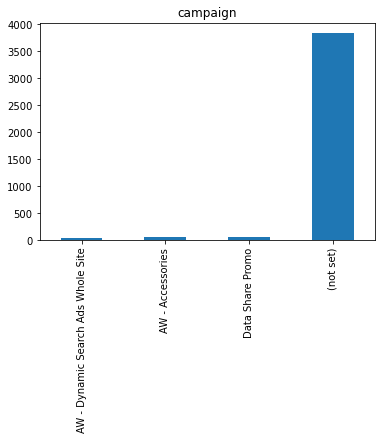

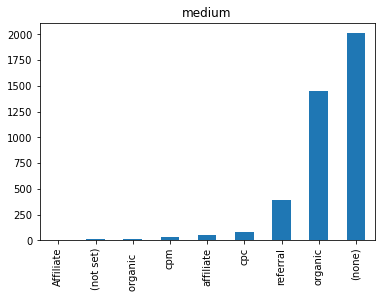

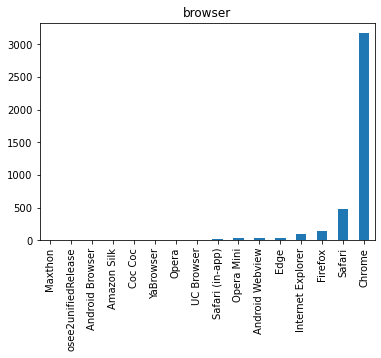

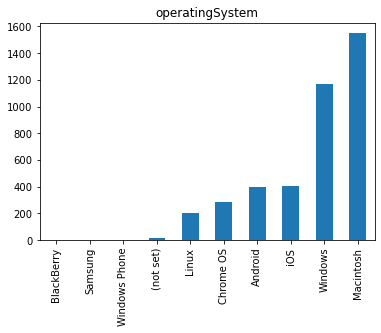

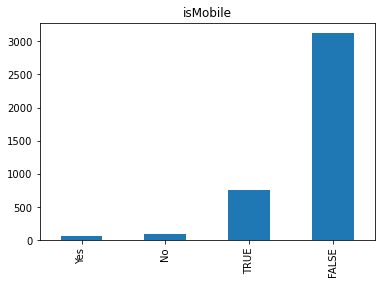

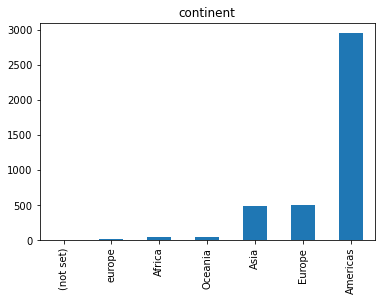

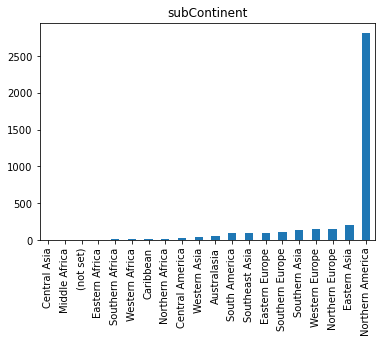

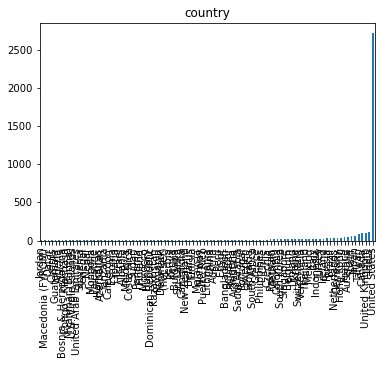

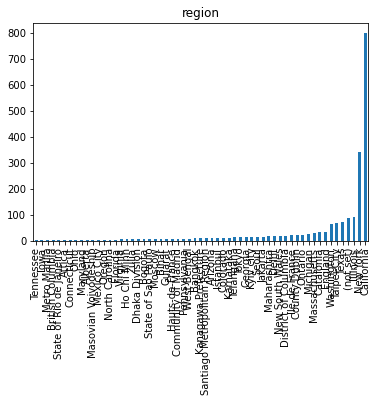

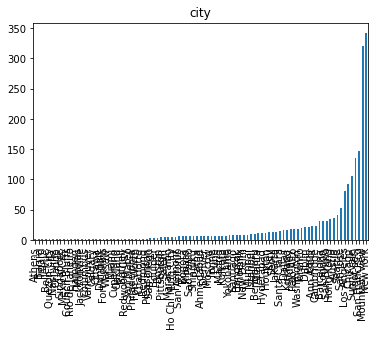

In [11]:
# Visualize barcharts for all categorical columns in the dataset
for column in ['campaign', 'medium', 'browser', 'operatingSystem', 'isMobile', 'continent', 'subContinent', 'country', 'region', 'city']:
    plt.figure()
    data[column].value_counts().sort_values().plot(kind = 'bar')
    plt.title(column)

We observe that:
1. Typos, inconsistent capitalization, or additional whitespace are present
    - The 'medium' variable contains (none) and (not set) which are synonyms
    - The 'medium' variable contains Affiliate and affiliate.
    - The 'medium' variable also contains two organic classes. This is probably caused by additional white space
    - The 'isMobile' variable contains Yes, No, TRUE, and FALSE. These could all be coded as binary
    - The 'continent' variable contains Europe and europe.
    - Subcontinent, Country, Region, and City contain to many categories to check, and see the next point:
2. A significant number of variables containts large amounts of missing data, such as the variables 'medium', 'campaign', 'region', and 'city'.


The final step in the exploratory analysis is creating a **correlation matrix**. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. We can add color intensity to each entry by its correlation to make it easier to spot significant correlations.

In [12]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\MauritsAkkerman\anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\MauritsAkkerman\anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,transactionRevenue,totalTransactionRevenue,sessionQualityDim
visitNumber,1.00,0.03,0.03,0.00,nan,0.06,0.05,0.02,0.21,0.18,0.00
visitId,0.03,1.00,1.00,0.85,nan,-0.24,-0.24,-0.12,0.01,-0.01,0.04
visitStartTime,0.03,1.00,1.00,0.85,nan,-0.24,-0.24,-0.12,0.01,-0.01,0.04
date,0.00,0.85,0.85,1.00,nan,-0.36,-0.36,-0.19,0.00,-0.01,0.02
visits,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
hits,0.06,-0.24,-0.24,-0.36,nan,1.00,0.99,0.71,0.18,0.34,0.53
pageviews,0.05,-0.24,-0.24,-0.36,nan,0.99,1.00,0.71,0.15,0.33,0.53
timeOnSite,0.02,-0.12,-0.12,-0.19,nan,0.71,0.71,1.00,0.14,0.24,0.32
transactionRevenue,0.21,0.01,0.01,0.00,nan,0.18,0.15,0.14,1.00,0.89,0.02
totalTransactionRevenue,0.18,-0.01,-0.01,-0.01,nan,0.34,0.33,0.24,0.89,1.00,0.03


From this correlation matrix, a couple of things stand out:
1. the variable 'visits' has no correlation with others, cause by it only consisting of the value 1. Hence, we will need to remove this variable.
2. We are interested in the transaction revenue and the two variables describing this are highly correlated. More detailed analysis showns that totalTransactionRevenue is always larger compared to transactionRevenue. When we asked the problem owner, he explained that not all revenue is included in the transactionRevenue column. Hence, we will take totalTransactionRevenue as our target variable and remove transactionRevenue.
3. There are some significant correlations between variables. For example, hits and pageviews are almost perfectly correlated, we will have to take this into account when applying linear regression.
4. Outliers might be affecting the correlation scores.

## Step 2.2: Cleaning the Data

[[ go back to the top ]](#Contents)

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

Let's walk through the issues one-by-one. The first is selecting useful variables for further analysis.

>There are irrelevant columns, non-numerical columns, and one column with 99% missing data in the dataset


In [13]:
# Select only those columns that are relevant for our business case.
columns = "visitNumber,date,hits,pageviews,timeOnSite,totalTransactionRevenue,campaign,medium,browser,operatingSystem,isMobile,continent".split(',')
subset = data[columns]
subset.head()

,visitNumber,date,hits,pageviews,timeOnSite,totalTransactionRevenue,campaign,medium,browser,operatingSystem,isMobile,continent
0,1,20160805,11,11,225.0,52000000.0,(not set),organic,Chrome,Chrome OS,FALSE,Americas
1,1,20160805,60,39,1848.0,83990000.0,(not set),(none),Chrome,Linux,FALSE,Americas
2,5,20160805,40,29,2180.0,30180000.0,(not set),(none),Chrome,Macintosh,FALSE,Americas
3,1,20160805,63,51,2407.0,29190000.0,(not set),(none),Chrome,Macintosh,FALSE,Americas
4,6,20160805,104,68,2042.0,355970000.0,(not set),(none),Chrome,Windows,FALSE,Americas


>There are a lot of missing values that need to be dealt with.

After talking to some of the data experts on the project we find out that Google Analytics doesn't always log 0 values, but that for numerical analysis we can fill the NaN fields with 0's. First let's check which columns included NaN observations.

In [14]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 0 to 4054
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visitNumber              4041 non-null   int64  
 1   date                     4041 non-null   int64  
 2   hits                     4041 non-null   int64  
 3   pageviews                4041 non-null   int64  
 4   timeOnSite               2946 non-null   float64
 5   totalTransactionRevenue  2015 non-null   float64
 6   campaign                 3970 non-null   object 
 7   medium                   4041 non-null   object 
 8   browser                  4041 non-null   object 
 9   operatingSystem          4041 non-null   object 
 10  isMobile                 4041 non-null   object 
 11  continent                4041 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 410.4+ KB


We see that besides the totalTransactionRevenue en timeOnSite, which we can log as 0 values. The campaign also has some missing values. Remembering that a majority of campaign had the value '(not set)', we can simply fill the missing values.

In [15]:
subset = subset.fillna(value={'timeOnSite': 0, 'totalTransactionRevenue': 0, 'campaign': '(not set)'})
subset.head()

,visitNumber,date,hits,pageviews,timeOnSite,totalTransactionRevenue,campaign,medium,browser,operatingSystem,isMobile,continent
0,1,20160805,11,11,225.0,52000000.0,(not set),organic,Chrome,Chrome OS,FALSE,Americas
1,1,20160805,60,39,1848.0,83990000.0,(not set),(none),Chrome,Linux,FALSE,Americas
2,5,20160805,40,29,2180.0,30180000.0,(not set),(none),Chrome,Macintosh,FALSE,Americas
3,1,20160805,63,51,2407.0,29190000.0,(not set),(none),Chrome,Macintosh,FALSE,Americas
4,6,20160805,104,68,2042.0,355970000.0,(not set),(none),Chrome,Windows,FALSE,Americas


Let's fix the structural issues identified earlier:
    - totalTransactionRevenue has some negative values
    - The 'medium' variable contains Affiliate and affiliate.
    - The 'medium' variable also contains organic and organic as classes. This is probably caused by additional white space
    - The 'isMobile' variable contains Yes, No, TRUE, and FALSE. These could all be coded as binary
    - The 'continent' variable contains Europe and europe.
    - The datatype of date is numerical instead of datetime


In [16]:
# First let's drop the negative totalTransactionRevenue's:
subset = subset[subset['totalTransactionRevenue'] >= 0]

# change Capitalization in medium:
subset['medium'] = subset['medium'].apply(lambda x: x.lower().strip())
subset['medium'].replace(to_replace='(none)', value='(not set)', inplace=True)

# Change isMobile to binary
subset['isMobile'] = subset['isMobile'].map({'TRUE':1, 'FALSE':0, 'Yes':1,'No':0})

# Change capitalization in continent:
subset['continent'] = subset['continent'].apply(lambda x: x.lower().strip().capitalize())

# Change the data type of the date to datetime instead of numerical
subset['date'] = pd.to_datetime(subset['date'],  format='%Y%m%d', errors='coerce')

subset.head()

,visitNumber,date,hits,pageviews,timeOnSite,totalTransactionRevenue,campaign,medium,browser,operatingSystem,isMobile,continent
0,1,2016-08-05,11,11,225.0,52000000.0,(not set),organic,Chrome,Chrome OS,0,Americas
1,1,2016-08-05,60,39,1848.0,83990000.0,(not set),(not set),Chrome,Linux,0,Americas
2,5,2016-08-05,40,29,2180.0,30180000.0,(not set),(not set),Chrome,Macintosh,0,Americas
3,1,2016-08-05,63,51,2407.0,29190000.0,(not set),(not set),Chrome,Macintosh,0,Americas
4,6,2016-08-05,104,68,2042.0,355970000.0,(not set),(not set),Chrome,Windows,0,Americas


> The scale of the totalTransactionRevenue variable needs to be verified.

After consulting with subject experts on the project we conclude that the revenue prices are wrongly listed and instead should be divided by 1.000.000.

In [17]:
subset['totalTransactionRevenue'] = subset['totalTransactionRevenue'].apply(lambda x: x/1000000)
subset.sort_values('totalTransactionRevenue', ascending = False).head()

,visitNumber,date,hits,pageviews,timeOnSite,totalTransactionRevenue,campaign,medium,browser,operatingSystem,isMobile,continent
3288,1,2017-03-20,386,343,6427.0,3775.80,(not set),(not set),Chrome,Windows,0,Americas
950,7,2017-02-09,20,17,1756.0,2877.00,(not set),(not set),Chrome,Windows,0,Americas
564,7,2016-11-23,80,61,5079.0,2657.00,(not set),(not set),Chrome,Macintosh,0,Americas
460,9,2016-11-02,35,30,989.0,2520.90,(not set),(not set),Chrome,Chrome OS,0,Americas
3825,305,2017-06-14,17,15,560.0,2341.56,(not set),cpm,Firefox,Windows,0,Americas


> Outlier data might be affecting correlation scores

Real-life data is often noisy and outliers can affect model performance. Outliers can also contain valuable data, so you shouldn't always instantly remove them. For example, you can review the underlying cause of an outlier. Perhaps, a logic explaination can be found that provides value for your project. 

For now, we will leave the outliers a

For simplicity, we assume that the outliers in this case do not contain such valuable insights and can be disregarded safely. 

A logic similar to the boxplot is used to detect and exclude outliers from our dataset. Don't worry if the term boxplot is unfamiliar, it iss a method to detect potential outliers.

In [18]:
# Don't worry if you don't understand these lines of codes  (we drop isMobile as it is recognized as numerical but in fact is not)
Q1 = subset.quantile(0.10).drop('isMobile')
Q3 = subset.quantile(0.90).drop('isMobile')
IQR = Q3 - Q1

columns = Q1.index
subset = subset[~((subset[columns] < (Q1 - 1.5 * IQR)) |(subset[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
subset.shape

(3709, 12)

Now we have 3709 observations. That means we have classified over 300 rows as outliers on some of the columns considered. Again normally, this is not good practice to just discard 7.5% of your dataset, but for simplicity we will do so anyways in this example.

## Step 2.3: Data Understanding

[[ go back to the top ]](#Contents)

Now after spending entirely too much time tidying our data, we can really start analyzing it!

In this step, we further delve into the data set, after removing outliers, errors, and redundant information. We'll be looking to answer questions such as:

* How is my data distributed?

* Are there any correlations in my data?

* Are there any confounding factors that explain these correlations?

This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use.

Let's first check how many rows are left after the data cleaning process.

In [19]:
subset.shape

(3709, 12)

We are left with 3709 rows from the original 4000 or 92.5% of the total data and 12 from the original 21 variables.

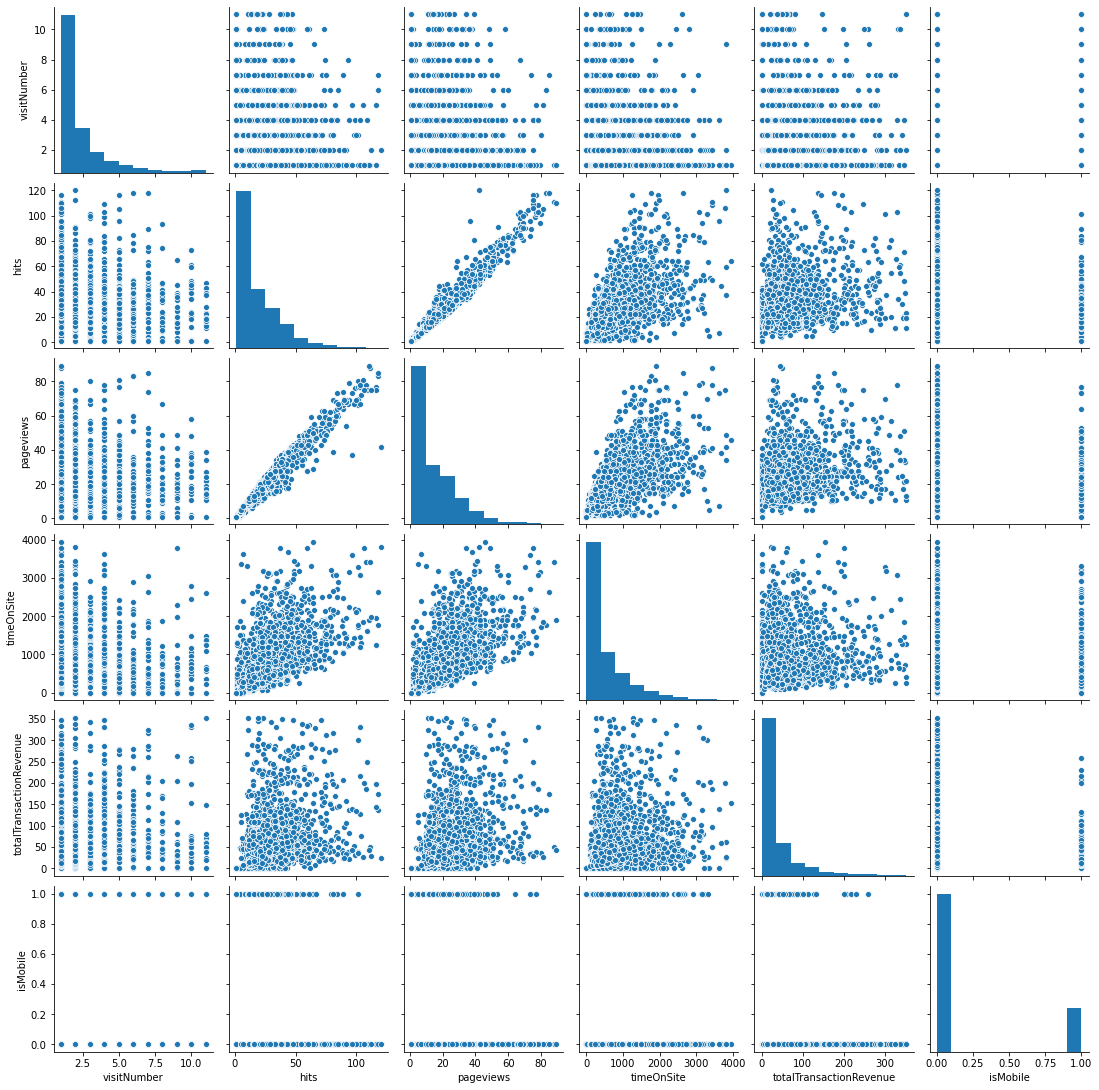

In [20]:
# Verify data cleaning by making a lot of plots
sns.pairplot(subset);

You do not have to know what every individual plot means. For data scientist, this approach is often used to quickly check if the data cleaning steps undertaken were succesfull. For example in the bottom right corner, we can now see that we have an isMobile function that consists only of the values 0 and 1.

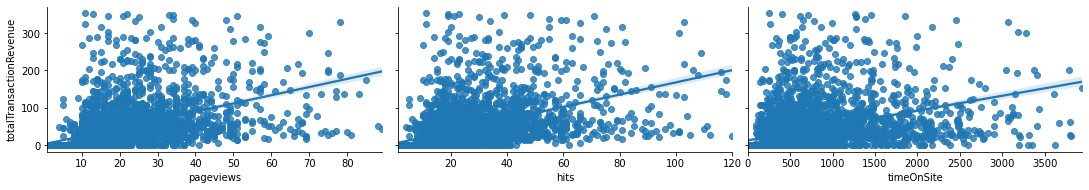

In [21]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(subset, x_vars=['pageviews','hits', 'timeOnSite'], y_vars='totalTransactionRevenue', aspect=2, kind='reg');

From the figures above, we observe that a positive relationship exists between the three independent variables "pageviews", "hits", and "timeOnSite" and the target or dependent variable totalTransactionRevenue. However, the effect is not as clear cut as we'd like. In the linear regression notebook we will dive deaper into the meaning behind these relationships.

In [22]:
corr = subset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,visitNumber,hits,pageviews,timeOnSite,totalTransactionRevenue,isMobile
visitNumber,1.00,0.22,0.21,0.16,0.27,-0.14
hits,0.22,1.00,0.99,0.75,0.57,-0.18
pageviews,0.21,0.99,1.00,0.77,0.58,-0.19
timeOnSite,0.16,0.75,0.77,1.00,0.46,-0.14
totalTransactionRevenue,0.27,0.57,0.58,0.46,1.00,-0.21
isMobile,-0.14,-0.18,-0.19,-0.14,-0.21,1.00


From the new correlation matrix, we can draw several conclusions:
1. Hits and pageviews are very strongly correlated. Therefore, in linear regression modelling, adding both variables could cause co-linearity. This means that the estimated regression parameters for one of the two could have the wrong size or sign.
2. The independent variables are all strongly correlated with the target variable and are therefore adequate variables to use for linear regression.

# Conclusion
[[ go back to the top ]](#Contents)

In this notebook, the process of transforming a raw dataset into a usable input for linear regression and machine learning is outlined. As you can see, the steps are not overly complex, but you do have to pay attention. Additionally, on several occasions during the analysis and cleaning, we encountered problems that required further business understanding. Data science is much more then just looking at data, we have to discover what the data actually means. We have to look behind the data, were does it originate, why are there negative values where there should be none? Answering questions like these and solving the root-causes of these data-errors improves your data quality and will help you elevate any data analysis to the next level.

In the following two notebooks, the topics of (multiple) linear regression and machine learning algorithms will be discussed.
    - link 1
    - link 2